# Homework 3 Problem 1

Christopher Prince (cmp670)

5 Oct 2015

In [1]:
from __future__ import print_function
import pylab as pl
import numpy as np
import math

%pylab inline

#Set a seed for reproducibility
np.random.seed(46311)

Populating the interactive namespace from numpy and matplotlib


We will set the mean to be 10 for each of the distributions. In terms of the `numpy` parameters for each distribution:
*  `mu_normal = loc`
*  `mu_poisson = lam`
*  `mu_binomial = n * p` (we use `n = 20, p = 0.5`)
*  `mu_chisquare = df`
*  `mu_rayleigh = scale *` $\sqrt{\pi/2}$ (we set scale to 10 $\sqrt{2/\pi}$)
*  `mu_wald = mean`

The calls to `random.normal` and `random.wald` require a second `scale` parameter which we will set to 1 (a decision we'll revisit later in this notebook).

We load the parameters as arrays into a dictionary using the numpy distribution names as keys.

In [2]:
distparams = {'normal': [10,1],
              'poisson': [10], 
              'binomial': [20,.5],
              'chisquare': [10],
              'rayleigh': [10*math.sqrt(2/math.pi)],
              'wald': [10,1]}

Now we generate an array of 100 values from 11 to 1999 using `logspace`.

In [3]:
sizes = np.array(logspace(log10(11),log10(1999),100))

Generate a dictionary containing 100 sets of samples for each of the distributions in `distparam` using a dictionary comprehension. `getattr()` is used to call functions from a string value (here, the keys of `distparam`), `*v` unpacks the parameter lists for the first items of the argument list, and each of the distributions has the named parameter `size` which we set explicitly using the `sizes` array.

In [4]:
distributions = {k: {s: getattr(np.random,k)(*v, size=s) for s in sizes} for (k, v) in distparams.iteritems()}

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


Calculate the means and standard deviations of each of the samples and plot against sample size for each distribution.

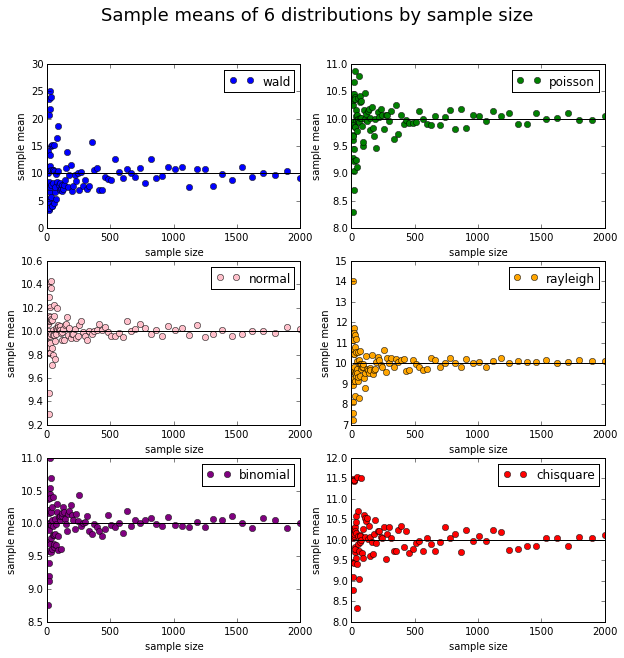

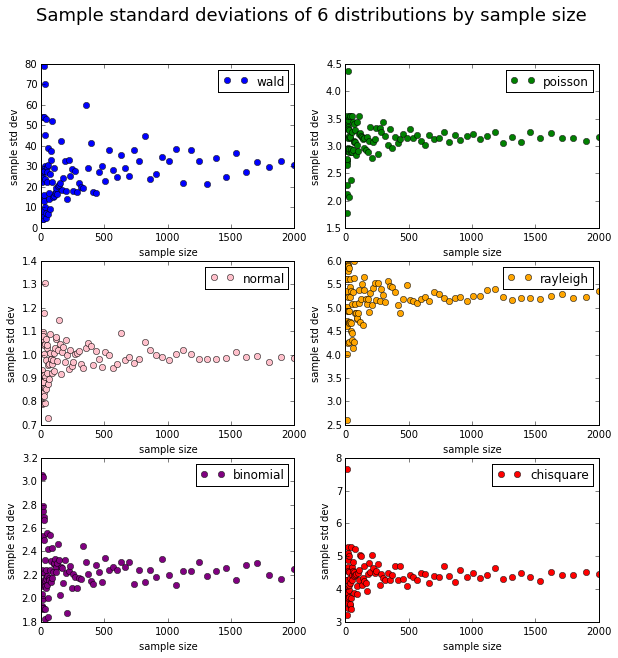

In [5]:
fig_mu_N = pl.figure(figsize=(10,10))
fig_mu_N.suptitle('Sample means of 6 distributions by sample size',size=18)
fig_s_N = pl.figure(figsize=(10,10))
fig_s_N.suptitle('Sample standard deviations of 6 distributions by sample size',size=18)
ax={}
axs={}
means={}
sds={}
i = 0
colors = ['blue','green','pink','orange','purple','red']
for distname in distributions.iterkeys():
    i += 1
    ax[distname] = fig_mu_N.add_subplot(3,2,i)
    axs[distname] = fig_s_N.add_subplot(3,2,i)
    means[distname] = [distributions[distname][nn].mean() for nn in sizes]
    sds[distname] = [distributions[distname][nn].std() for nn in sizes]
    ax[distname].plot(sizes, means[distname], 
                      'o', label = distname, color = colors[i-1])
    ax[distname].legend()   
    ax[distname].set_xlabel('sample size')
    ax[distname].set_ylabel('sample mean')
    ax[distname].plot([min(sizes), max(sizes)], [10,10], 'k')
    axs[distname].plot(sizes, sds[distname], 
                      'o', label = distname, color = colors[i-1])
    axs[distname].legend()   
    axs[distname].set_xlabel('sample size')
    axs[distname].set_ylabel('sample std dev')

Note the larger variance of some distributions, like the rayleigh and (especially) wald. Most of the sample means appear to converge to the population mean quite quickly. Intuitively, as more and more samples are created, the means will cluster tightly around this value. Next we create a histogram for the means of all samples to check this intuition.

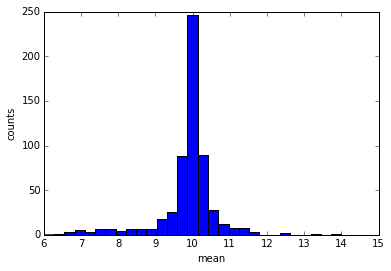

In [6]:
flatmeans = [x for y in means.values() for x in y]    #flatten the means dictionary into a list
n, b, p = pl.hist(flatmeans, bins=linspace(6,14,30))
plt.xlabel('mean')
plt.ylabel('counts')
plt.show()

This does not look particularly normal; there is a sharp peak in the bin at &mu; (as noted in the discussion above) and long, sparse tails. Nevertheless, we calculate the mean and standard deviation of the sample means to fit a Gaussian curve and plot it on top of the histogram using the technique in http://stackoverflow.com/questions/7805552/fitting-a-histogram-with-python

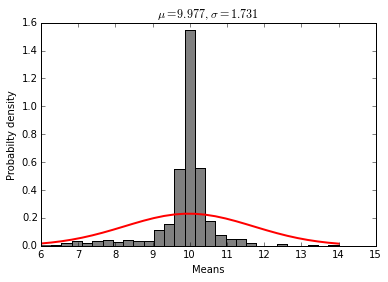

In [7]:
# best fit of data
mu = np.mean(flatmeans)
sigma = np.std(flatmeans)

# the histogram of the data
n, bins, patches = plt.hist(flatmeans, bins=linspace(6,14,30), normed=1, facecolor='gray')

# add a 'best fit' line
y = pl.normpdf( bins, mu, sigma)
l = pl.plot(bins, y, 'r', linewidth=2)

#plot
plt.xlabel('Means')
plt.ylabel('Probabilty density')
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.show()


We note that of the six distributions plotted above, the wald distribution produces the highest variance (see the standard deviation plot above). This could be a reason why the tails are so long. What happens if we tweak wald's `shape` parameter and replot the histogram above?

In [8]:
distparams.update(wald=[10,10])
distributions = {k: {s: getattr(np.random,k)(*v, size=s) for s in sizes} for (k, v) in distparams.iteritems()}
means={}
for distname in distributions.iterkeys():
    means[distname] = [distributions[distname][nn].mean() for nn in sizes]

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


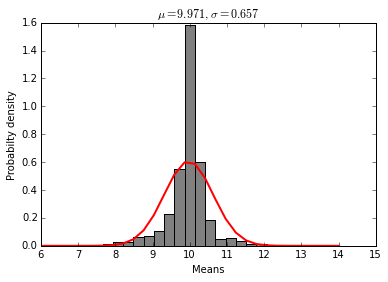

In [9]:
flatmeans = [x for y in means.values() for x in y]    #flatten the means dictionary into a list
# best fit of data
mu = np.mean(flatmeans)
sigma = np.std(flatmeans)

# the histogram of the data
n, bins, patches = plt.hist(flatmeans, bins=linspace(6,14,30), normed=1, facecolor='gray')

# add a 'best fit' line
y = pl.normpdf( bins, mu, sigma)
l = pl.plot(bins, y, 'r', linewidth=2)

#plot
plt.xlabel('Means')
plt.ylabel('Probabilty density')
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.show()

Though still far from perfect, this is a much better fit than before. The mean has barely moved, but the standard deviation of the sample means has been reduced by more than half. This has the effect of shortening the tails of the histogram and making the fit less flat.